# 데이터 설명


국가 통계 마이크로센터 보건 급성심장정지조사
https://mdis.kostat.go.kr/extract/extYearsSurvSearchNew.do?curMenuNo=UI_POR_P9012

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 


In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.columns=['성별','연령(만 나이)','병원 도착 전 심폐소생술 시행 여부','병원 도착 전 자발순환 회복 여부','병원 도착 전 급성심장정지 목격 여부','급성심장정지 목격시각','일반인 심폐소생술 시행여부','병원 도착 전 제세동 실시 여부','과거력_고혈압','과거력_당뇨병','과거력_심장질환','과거력_만성신장질환','과거력_호흡기질환','과거력_뇌졸중','과거력_이상지질혈증','음주력','흡연력','응급실 심폐소생술 후 자발순환 회복 여부','119 신고 시각','구급대 자동심장충격기 시행 여부','구급차 도착 전 응급처치 지도','응급실 진료결과','심장정지 발생시각','병원 도착시각']

# 데이터 전처리 

### 1. 시각 데이터 전처리
### 2. Duplicate 값 제거
### 3. Nan값은 제거

In [4]:
data=data.drop(['병원 도착 전 심폐소생술 시행 여부','병원 도착 전 급성심장정지 목격 여부','일반인 심폐소생술 시행여부','과거력_이상지질혈증','과거력_호흡기질환','음주력','과거력_만성신장질환','과거력_뇌졸중','병원 도착 전 제세동 실시 여부','과거력_고혈압','과거력_당뇨병','과거력_심장질환'],axis=1)


In [5]:
print(list(data.columns))

['성별', '연령(만 나이)', '병원 도착 전 자발순환 회복 여부', '급성심장정지 목격시각', '흡연력', '응급실 심폐소생술 후 자발순환 회복 여부', '119 신고 시각', '구급대 자동심장충격기 시행 여부', '구급차 도착 전 응급처치 지도', '응급실 진료결과', '심장정지 발생시각', '병원 도착시각']


위의 속성을 이용해 응급실 진료결과(사망, 생존)를 예측하겠습니다.

In [6]:
data.shape

(30179, 12)

In [7]:
data.loc[data.loc[:,'병원 도착 전 자발순환 회복 여부']==9,'병원 도착 전 자발순환 회복 여부']=np.NaN
data.loc[data.loc[:,'흡연력']==9,'흡연력']=np.NaN
data.loc[data.loc[:,'응급실 심폐소생술 후 자발순환 회복 여부']==9,'응급실 심폐소생술 후 자발순환 회복 여부']=np.NaN
data.loc[data.loc[:,'구급대 자동심장충격기 시행 여부']==9,'구급대 자동심장충격기 시행 여부']=np.NaN
data.loc[data.loc[:,'구급차 도착 전 응급처치 지도']==1,'구급차 도착 전 응급처치 지도']='없음'
data.loc[data.loc[:,'구급차 도착 전 응급처치 지도']==2,'구급차 도착 전 응급처치 지도']='있음'
data.loc[data.loc[:,'구급차 도착 전 응급처치 지도']==3,'구급차 도착 전 응급처치 지도']='있음'
data.loc[data.loc[:,'구급차 도착 전 응급처치 지도']==8,'구급차 도착 전 응급처치 지도']='있음'
data.loc[data.loc[:,'성별']==1,'성별']='남자'
data.loc[data.loc[:,'성별']==2,'성별']='여자'
data.loc[data.loc[:,'응급실 진료결과']<40,'응급실 진료결과']=1
data.loc[data.loc[:,'응급실 진료결과']>=40,'응급실 진료결과']=0
data.loc[data.loc[:,'응급실 진료결과']==0,'응급실 진료결과']='death'
data.loc[data.loc[:,'응급실 진료결과']==1,'응급실 진료결과']='alive'
data.loc[data.loc[:,'흡연력']==2,'흡연력']='과거흡연'
data.loc[data.loc[:,'흡연력']==1,'흡연력']='현재흡연'
data.loc[data.loc[:,'흡연력']==8,'흡연력']='없음'
data.loc[data.loc[:,'구급대 자동심장충격기 시행 여부']==1,'구급대 자동심장충격기 시행 여부']='시행하지 않음'
data.loc[data.loc[:,'구급대 자동심장충격기 시행 여부']==2,'구급대 자동심장충격기 시행 여부']='시행함'
data.loc[data.loc[:,'응급실 심폐소생술 후 자발순환 회복 여부']==1,'응급실 심폐소생술 후 자발순환 회복 여부']='회복되지 않음'
data.loc[data.loc[:,'응급실 심폐소생술 후 자발순환 회복 여부']==2,'응급실 심폐소생술 후 자발순환 회복 여부']='자발순환 회복됨'
data.loc[data.loc[:,'병원 도착 전 자발순환 회복 여부']==1,'병원 도착 전 자발순환 회복 여부']='자발순환 회복'
data.loc[data.loc[:,'병원 도착 전 자발순환 회복 여부']==2,'병원 도착 전 자발순환 회복 여부']='자발순환 회복 없음'

## 시각데이터 전처리

급성심장정지 목격시각, 심장정지 발생시각, 119 신고 시각, 병원 도착 시각을 이용해서 심정지 발생 후 응급실 도착 걸린 시간,심정지 발생후 심정지 목격에 걸린 시간을 구했습니다.   

제가 생각했을 때 심장정지 발생했을 때 생존을 위해서 중요한게 심정지 발생 후 빨리발견 되는 것과 빠르게 병원을 이송하는 거라 생각해서 위의 특성을 만들었습니다.


시간 데이터에 시간분 형식으로 들어가 있습니다.(13:15분인 경우 1315)
데이터 값에 저 형식 말고 nan과 9999 0(0은 00:00분을 나타내는 것과 다른 값과 비교했을 때 비정상적인 값)이 들어있어 9999와 0은 nan으로 바꿨습니다.

In [8]:
data.loc[(data['급성심장정지 목격시각']==9999)|(data['급성심장정지 목격시각']==0),'급성심장정지 목격시각']=np.NaN
data.loc[(data['심장정지 발생시각']==9999)|(data['심장정지 발생시각']==0),'심장정지 발생시각']=np.NaN
data.loc[(data['119 신고 시각']==9999)|(data['119 신고 시각']==0),'119 신고 시각']=np.NaN
data.loc[(data['병원 도착시각']==9999)|(data['병원 도착시각']==0),'병원 도착시각']=np.NaN

시각단위을 분단위로 바꿨습니다.

In [9]:
for i in range(len(data['119 신고 시각'])):
    if data['119 신고 시각'][i]!=np.NaN:
        data['119 신고 시각'][i]=data['119 신고 시각'][i]//100*60+data['119 신고 시각'][i]%100
    if data['급성심장정지 목격시각'][i]!=np.NaN:    
        data['급성심장정지 목격시각'][i]=data['급성심장정지 목격시각'][i]//100*60+data['급성심장정지 목격시각'][i]%100
    if data['심장정지 발생시각'][i]!=np.NaN:
        data['심장정지 발생시각'][i]=data['심장정지 발생시각'][i]//100*60+data['심장정지 발생시각'][i]%100
    if data['병원 도착시각'][i]!=np.NaN:    
        data['병원 도착시각'][i]=data['병원 도착시각'][i]//100*60+data['병원 도착시각'][i]%100

In [10]:
data.index=range(len(data['성별']))
data['심정지 발생후 심정지 목격에 걸린 시간']=pd._libs.tslibs.nattype.NaTType
for i in range(len(data['병원 도착시각'])):
    idx1=False
    if data['급성심장정지 목격시각'][i]==pd.NaT or data['심장정지 발생시각'][i]==pd.NaT :
        continue
    if data['급성심장정지 목격시각'][i]<data['심장정지 발생시각'][i]:
        data['급성심장정지 목격시각'][i]+=1440
        idx1=True
    data['심정지 발생후 심정지 목격에 걸린 시간'][i]=data['급성심장정지 목격시각'][i]-data['심장정지 발생시각'][i]
    if idx1:
        data['급성심장정지 목격시각'][i]-=1440
    if data['심정지 발생후 심정지 목격에 걸린 시간'][i]>1000 and ((data['심장정지 발생시각'][i]-data['급성심장정지 목격시각'][i])>0):
        data['심정지 발생후 심정지 목격에 걸린 시간'][i]=data['심장정지 발생시각'][i]-data['급성심장정지 목격시각'][i]

심정지 발생 후 응급실 도착 걸린 시간을 구하는 과정에서 가장 정확한 순서인 심장정지 발생시각->급성심장정지 목격시각-> 119 신고 시각으로 값이 있으면 계산을 하고 없으면 다음 속성에서 값을 구했습니다.

In [11]:
data.index=range(len(data['성별']))
data['심정지 발생 후 응급실 도착 걸린 시간']=pd._libs.tslibs.nattype.NaTType
for i in range(len(data['병원 도착시각'])):
    idx1=False
    idx2=False
    idx3=False
    if data['병원 도착시각'][i]==pd.NaT :
        continue
    if type(data['심장정지 발생시각'][i])!=pd._libs.tslibs.nattype.NaTType:
        if data['병원 도착시각'][i]<data['심장정지 발생시각'][i]:
            data['병원 도착시각'][i]+=1440
            idx1=True
        data['심정지 발생 후 응급실 도착 걸린 시간'][i]=data['병원 도착시각'][i]-data['심장정지 발생시각'][i]
        if data['심정지 발생 후 응급실 도착 걸린 시간'][i]<200:
            if idx1:
                data['병원 도착시각'][i]-=1440
            continue
        if idx1:
            data['병원 도착시각'][i]-=1440
    if type(data['급성심장정지 목격시각'][i])!=pd._libs.tslibs.nattype.NaTType:
        if data['병원 도착시각'][i]<data['급성심장정지 목격시각'][i]:
            data['병원 도착시각'][i]+=1440
            idx2=True
        data['심정지 발생 후 응급실 도착 걸린 시간'][i]=data['병원 도착시각'][i]-data['급성심장정지 목격시각'][i]
        if data['심정지 발생 후 응급실 도착 걸린 시간'][i]<200:
            if idx2:
                data['병원 도착시각'][i]-=1440
            continue
        if idx2:
            data['병원 도착시각'][i]-=1440
    if type(data['119 신고 시각'][i])!=pd._libs.tslibs.nattype.NaTType:
        if data['병원 도착시각'][i]<data['119 신고 시각'][i]:
            data['병원 도착시각'][i]+=1440
            idx3=True
        data['심정지 발생 후 응급실 도착 걸린 시간'][i]=data['병원 도착시각'][i]-data['119 신고 시각'][i]
        if data['심정지 발생 후 응급실 도착 걸린 시간'][i]<200:
            if idx3:
                data['병원 도착시각'][i]-=1440
            continue
        if idx3:
            data['병원 도착시각'][i]-=1440

In [12]:
data1=data.drop(['급성심장정지 목격시각','병원 도착시각','심장정지 발생시각','119 신고 시각'],axis=1
               )

In [13]:
data1=data1.dropna()

In [14]:
data1.describe(include='all')

,성별,연령(만 나이),병원 도착 전 자발순환 회복 여부,흡연력,응급실 심폐소생술 후 자발순환 회복 여부,구급대 자동심장충격기 시행 여부,구급차 도착 전 응급처치 지도,응급실 진료결과,심정지 발생후 심정지 목격에 걸린 시간,심정지 발생 후 응급실 도착 걸린 시간
count,1089,1089.000000,1089,1089,1089,1089,1089,1089,1089.0,1089.0
unique,2,NaN,1,3,2,2,2,2,73.0,83.0
top,남자,NaN,자발순환 회복 없음,없음,자발순환 회복됨,시행하지 않음,있음,alive,0.0,29.0
freq,792,NaN,1089,550,974,765,710,804,342.0,42.0
mean,NaN,64.423324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,15.763004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data1.duplicated(['성별', '연령(만 나이)',  '병원 도착 전 자발순환 회복 여부', '흡연력', '응급실 심폐소생술 후 자발순환 회복 여부',
       '구급대 자동심장충격기 시행 여부', '구급차 도착 전 응급처치 지도', 
       '심정지 발생 후 응급실 도착 걸린 시간','심정지 발생후 심정지 목격에 걸린 시간']).sum()

3

In [16]:
data1['응급실 진료결과'].value_counts()

alive    804
death    285
Name: 응급실 진료결과, dtype: int64

In [17]:
import matplotlib.pyplot as plt

여기서 numeric data인 연령, 심정지 발생후 심정지 목격에 걸린 시간, 심정지 발생후 응급실 도착 걸린 시간의 이상치를 제거하겠습니다.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce272c5880>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce272c5f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce272c5520>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce272dc640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce272dc9a0>],
 'means': []}

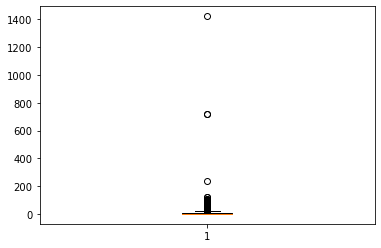

In [19]:
plt.boxplot(data1['심정지 발생후 심정지 목격에 걸린 시간'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce27a45640>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce27a45d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce27a452e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce27a54400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce27a54760>],
 'means': []}

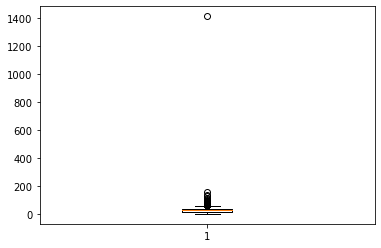

In [20]:
plt.boxplot(data1['심정지 발생 후 응급실 도착 걸린 시간'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce27aa5df0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce27ab7490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce27aa5a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce27ab7b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce27ab7eb0>],
 'means': []}

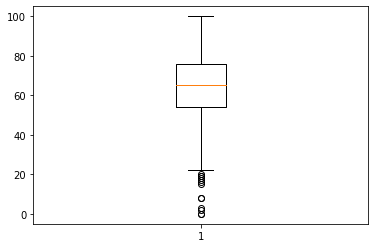

In [21]:
plt.boxplot(data1['연령(만 나이)'])

In [22]:
def outliers_iqr(data):
    q1,q3=np.percentile(data,[25,75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    return upper_bound,lower_bound
print(outliers_iqr(data1['심정지 발생 후 응급실 도착 걸린 시간']))

(62.0, -10.0)


In [23]:
print(outliers_iqr(data1['연령(만 나이)']))

(109.0, 21.0)


In [24]:
print(outliers_iqr(data1['심정지 발생후 심정지 목격에 걸린 시간']))

(20.0, -12.0)


In [25]:
data1.loc[data1['심정지 발생 후 응급실 도착 걸린 시간']>62]=np.NaN

In [26]:
data1.loc[data1['심정지 발생후 심정지 목격에 걸린 시간']>20]=np.NaN
data1.loc[data1['심정지 발생후 심정지 목격에 걸린 시간']<0]=np.NaN

In [27]:
data1.loc[data1['연령(만 나이)']<21]=np.NaN

In [28]:
data1=data1.dropna()

In [29]:
data1.shape

(962, 10)

(array([ 99.,  98.,  74., 150., 205., 165.,  65.,  59.,  34.,  13.]),
 array([1.0, 7.0, 13.0, 19.0, 25.0, 31.0, 37.0, 43.0, 49.0, 55.0, 61.0],
       dtype=object),
 <BarContainer object of 10 artists>)

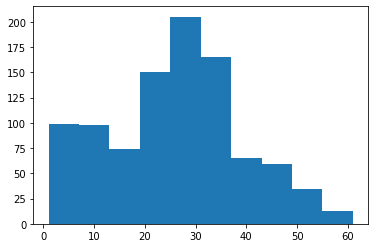

In [30]:
plt.hist(data1['심정지 발생 후 응급실 도착 걸린 시간'],bins=10)

(array([ 14.,  20.,  59., 122., 139., 179., 183., 163.,  76.,   7.]),
 array([ 22. ,  29.8,  37.6,  45.4,  53.2,  61. ,  68.8,  76.6,  84.4,
         92.2, 100. ]),
 <BarContainer object of 10 artists>)

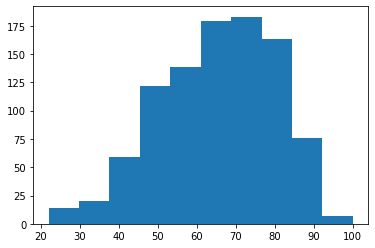

In [31]:
plt.hist(data1['연령(만 나이)'],bins=10)

(array([470., 159., 105.,  55.,  38.,  57.,  25.,  22.,  13.,  18.]),
 array([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0],
       dtype=object),
 <BarContainer object of 10 artists>)

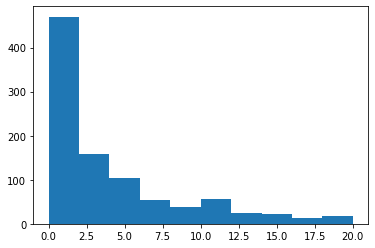

In [32]:
plt.hist(data1['심정지 발생후 심정지 목격에 걸린 시간'],bins=10)

In [33]:
data1.shape

(962, 10)

<BarContainer object of 2 artists>

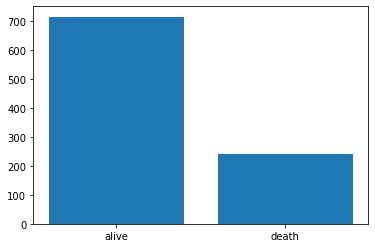

In [110]:
plt.bar(['alive','death'],data1['응급실 진료결과'].value_counts())

In [111]:
data1['응급실 진료결과'].value_counts()

alive    716
death    243
Name: 응급실 진료결과, dtype: int64

In [35]:
data1=data1.drop_duplicates(['성별', '연령(만 나이)',  '병원 도착 전 자발순환 회복 여부',
                             '흡연력', '응급실 심폐소생술 후 자발순환 회복 여부',
       '구급대 자동심장충격기 시행 여부', '구급차 도착 전 응급처치 지도', 
       '심정지 발생 후 응급실 도착 걸린 시간','심정지 발생후 심정지 목격에 걸린 시간'])

In [36]:
data1[100:120]

,성별,연령(만 나이),병원 도착 전 자발순환 회복 여부,흡연력,응급실 심폐소생술 후 자발순환 회복 여부,구급대 자동심장충격기 시행 여부,구급차 도착 전 응급처치 지도,응급실 진료결과,심정지 발생후 심정지 목격에 걸린 시간,심정지 발생 후 응급실 도착 걸린 시간
3585,남자,49.0,자발순환 회복 없음,없음,자발순환 회복됨,시행하지 않음,없음,alive,1.0,3.0
3586,남자,49.0,자발순환 회복 없음,없음,자발순환 회복됨,시행하지 않음,있음,alive,0.0,24.0
3593,남자,49.0,자발순환 회복 없음,현재흡연,자발순환 회복됨,시행함,있음,alive,5.0,27.0
3594,남자,49.0,자발순환 회복 없음,현재흡연,자발순환 회복됨,시행하지 않음,없음,alive,2.0,29.0
3596,남자,49.0,자발순환 회복 없음,현재흡연,자발순환 회복됨,시행함,있음,alive,3.0,34.0
3611,남자,49.0,자발순환 회복 없음,현재흡연,자발순환 회복됨,시행함,있음,alive,0.0,26.0
3633,남자,49.0,자발순환 회복 없음,현재흡연,자발순환 회복됨,시행함,있음,alive,3.0,36.0
3634,남자,49.0,자발순환 회복 없음,현재흡연,자발순환 회복됨,시행하지 않음,없음,alive,10.0,30.0
3636,남자,49.0,자발순환 회복 없음,현재흡연,회복되지 않음,시행함,없음,death,7.0,23.0
3642,남자,49.0,자발순환 회복 없음,과거흡연,자발순환 회복됨,시행함,있음,alive,1.0,25.0


In [37]:
data1.shape

(959, 10)

In [38]:
target=data1['응급실 진료결과']
predictor=data1.drop(['응급실 진료결과'],axis=1)

카테고리 데이터는 클래스 별로 상관관계가 없으니 one hot encoder를 사용 numeric데이터는 scale조정을 했습니다. 그리고 응급실 진료 결과가 비율이 맞지 않아 oversampling 10-fold로 정확도를 구했습니다.

In [130]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

label = LabelEncoder()

target = label.fit_transform(data1['응급실 진료결과'])
label_names=['alive','death']
label_order=label.transform(label_names)


numeric_features = ['심정지 발생 후 응급실 도착 걸린 시간','연령(만 나이)','심정지 발생후 심정지 목격에 걸린 시간']
categorical_features = ['성별','응급실 심폐소생술 후 자발순환 회복 여부','병원 도착 전 자발순환 회복 여부',
       '구급대 자동심장충격기 시행 여부', '구급차 도착 전 응급처치 지도','흡연력']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        ])
pipeline = Pipeline([ 
    ('preprocessing', preprocessor), 
     ('balancing', RandomOverSampler()),
    ('estimator', None)])
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [133]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [134]:
#define function for computing average roc for cross validation
#see http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]
    tprs = []
    aucs = []
    
    for train_indices, test_indices in cv.split(data, target):
        train_data = data.iloc[train_indices]
        train_target = target[train_indices]
        estimator.fit(train_data, train_target)

        test_data = data.iloc[test_indices]
        test_target = target[test_indices]
        decision_for_each_class = estimator.predict_proba(test_data)#have to use predict_proba or decision_function 
    
        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:,1], pos_label=pos_label)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0 # tprs[-1] access the last element
        aucs.append(auc(fpr, tpr))
        
        #plt.plot(fpr, tpr)# plot for each fold
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0 # set the last tpr to 1
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    return mean_fpr, mean_tpr, mean_auc, std_auc

### Decision Tree Classifier

In [135]:
pipeline.set_params(estimator=DecisionTreeClassifier())
tree_prediction = cross_val_predict(pipeline, predictor, target, cv=cv)
acc_tree = accuracy_score(target, tree_prediction)
print('acc_tree',acc_tree)
print(classification_report(target, tree_prediction, target_names=label_names))

acc_tree 0.6976016684045881
              precision    recall  f1-score   support

       alive       0.81      0.78      0.79       716
       death       0.41      0.47      0.44       243

    accuracy                           0.70       959
   macro avg       0.61      0.62      0.62       959
weighted avg       0.71      0.70      0.70       959



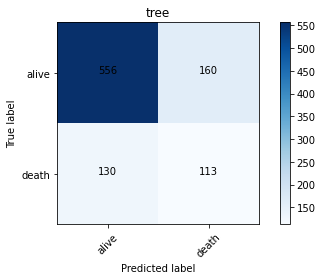

              precision    recall  f1-score   support

       alive       0.81      0.78      0.79       716
       death       0.41      0.47      0.44       243

    accuracy                           0.70       959
   macro avg       0.61      0.62      0.62       959
weighted avg       0.71      0.70      0.70       959



In [136]:
cm_tree = confusion_matrix(target, tree_prediction, labels=label_order)

plot_confusion_matrix(cm_tree, classes=label_names, title='tree')
plt.show()
print(classification_report(target, tree_prediction, target_names=label_names))

클래스 비율이 맞지 않아 사망 생존의 f1 score precision racall이 차이가 난다.


roc 곡선

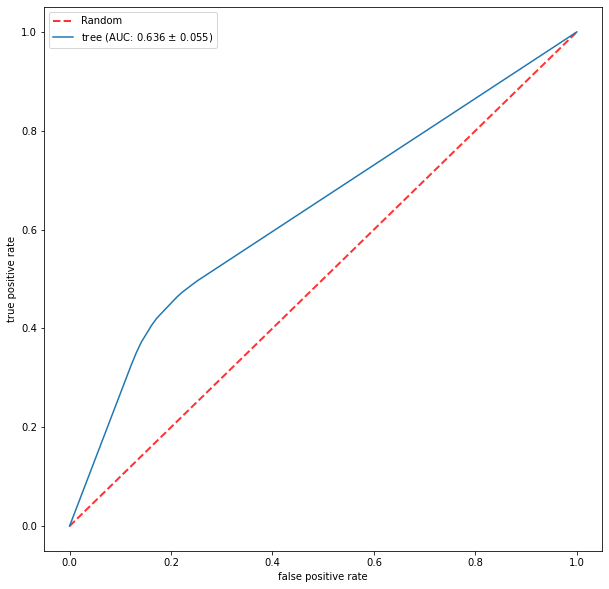

In [137]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8) # draw diagonal
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, predictor,target, 1)
plt.plot(mean_fpr, mean_tpr, label='tree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

gird_search를 이용해서 best_parm을 찾는다

In [138]:
params={'estimator__criterion': ('gini', 'entropy'),
'estimator__max_depth': [2, 3, 4, 5, None],
'estimator__min_samples_split' :[1,2,3,4]}

tree1=DecisionTreeClassifier()
pipeline.set_params(estimator=tree1)
grid_search_estimator=GridSearchCV(pipeline,params,cv=cv)
prediction = cross_val_predict(grid_search_estimator,predictor, target, cv=cv )
optimized_tree_acc = accuracy_score(target, prediction)
print(optimized_tree_acc)
grid_search_estimator.fit(predictor, target)

print("Optimised Parameters: {}".format(grid_search_estimator.best_params_))

0.821689259645464
Optimised Parameters: {'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__min_samples_split': 2}


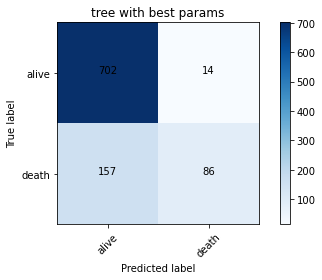

optimized tree accuracy =  0.821689259645464
              precision    recall  f1-score   support

       alive       0.82      0.98      0.89       716
       death       0.86      0.35      0.50       243

    accuracy                           0.82       959
   macro avg       0.84      0.67      0.70       959
weighted avg       0.83      0.82      0.79       959



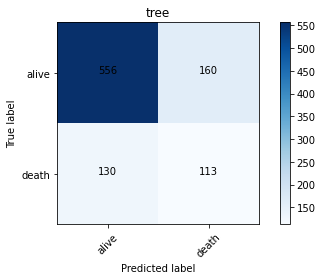

tree accuracy =  0.6976016684045881
              precision    recall  f1-score   support

       alive       0.81      0.78      0.79       716
       death       0.41      0.47      0.44       243

    accuracy                           0.70       959
   macro avg       0.61      0.62      0.62       959
weighted avg       0.71      0.70      0.70       959



In [139]:

cm = confusion_matrix(target, prediction, labels=label_order)


plot_confusion_matrix(cm, classes=label_names, title='tree with best params')
plt.show()
print('optimized tree accuracy = ',optimized_tree_acc)
print(classification_report(target, prediction, target_names=label_names))



cm_tree = confusion_matrix(target, tree_prediction, labels=label_order)
plot_confusion_matrix(cm_tree, classes=label_names, title='tree')
plt.show()
print('tree accuracy = ',acc_tree)
print(classification_report(target, tree_prediction, target_names=label_names))

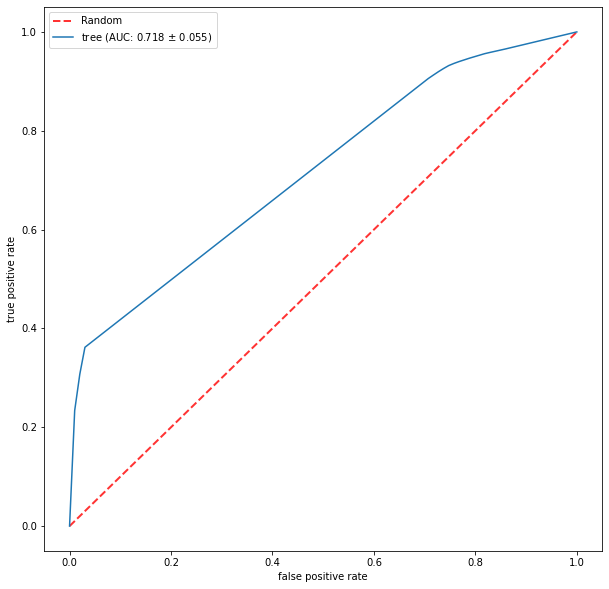

In [140]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8) # draw diagonal
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, grid_search_estimator, predictor,target, 1)
plt.plot(mean_fpr, mean_tpr, label='tree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

In [141]:
params={'estimator__n_neighbors':range(1,200)}

knn=KNeighborsClassifier()
pipeline.set_params(estimator=knn)
grid_search_estimator=GridSearchCV(pipeline,params,cv=cv)
prediction = cross_val_predict(grid_search_estimator,predictor, target, cv=cv )
knn_acc = accuracy_score(target, prediction)
print(knn_acc)
grid_search_estimator.fit(predictor, target)

print("Optimised Parameters: {}".format(grid_search_estimator.best_params_))

0.7518248175182481
Optimised Parameters: {'estimator__n_neighbors': 142}


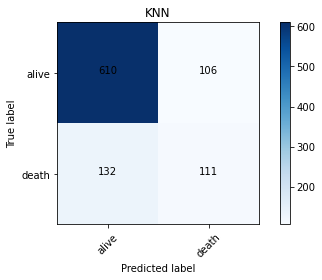

KNN accuracy =  0.7518248175182481
              precision    recall  f1-score   support

       alive       0.82      0.85      0.84       716
       death       0.51      0.46      0.48       243

    accuracy                           0.75       959
   macro avg       0.67      0.65      0.66       959
weighted avg       0.74      0.75      0.75       959



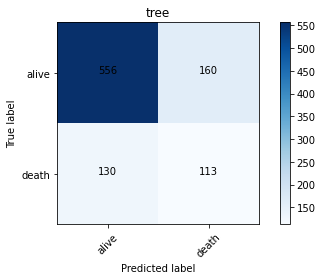

tree accuracy =  0.6976016684045881
              precision    recall  f1-score   support

       alive       0.81      0.78      0.79       716
       death       0.41      0.47      0.44       243

    accuracy                           0.70       959
   macro avg       0.61      0.62      0.62       959
weighted avg       0.71      0.70      0.70       959



In [142]:

cm = confusion_matrix(target, prediction, labels=label_order)

plot_confusion_matrix(cm, classes=label_names, title='KNN')
plt.show()
print('KNN accuracy = ',knn_acc)
print(classification_report(target, prediction, target_names=label_names))


cm_tree = confusion_matrix(target, tree_prediction, labels=label_order)
plot_confusion_matrix(cm_tree, classes=label_names, title='tree')
plt.show()
print('tree accuracy = ',acc_tree)
print(classification_report(target, tree_prediction, target_names=label_names))

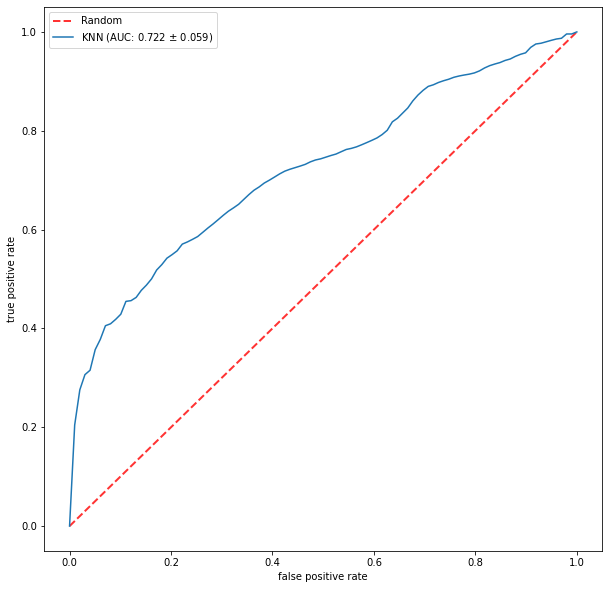

In [143]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8) # draw diagonal
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, grid_search_estimator, predictor,target, 1)
plt.plot(mean_fpr, mean_tpr, label='KNN (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

### gradient boosting

gradient boosting과 random forest에서 best n_estimators를 구하기 위해서 조기종료 방법을 사용해서 구했습니다.
grid_search를 사용할 수 있지만 모든 경우의 수를 다 찾아야하기 때문에 오래 걸려 다른 방법인 조기 종료를 사용하게 됐습니다.

warm_start가 지정되면 fit메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감으로 시간을 절약할 수 있다.

조기종료 방법은 일정횟수만큼 성능이 개선되지 않으면 훈련을 멈추는 방식을 말한다. 



In [144]:
gbrt=GradientBoostingClassifier(max_depth=3,warm_start=True)
max_val_acc=-1.0
acc_going_up=0
pipeline.set_params(estimator=gbrt)
best_n_estimators=0

for n_estimators in range(1,200):
    pipeline.set_params(estimator__n_estimators=n_estimators)
    y_pred = cross_val_predict(pipeline, predictor, target, cv=cv)
    val_acc=accuracy_score(target, y_pred)
    if val_acc>max_val_acc:
        max_val_acc=val_acc
        best_n_estimators=n_estimators
        acc_going_up=0
    else:
        acc_going_up+=1
        if acc_going_up==20:
            break
            

In [145]:
print("max acc = ",max_val_acc," best n_estimaors = ",best_n_estimators)

max acc =  0.8039624608967675  best n_estimaors =  9


In [146]:

gbrt=GradientBoostingClassifier(max_depth=2,warm_start=True)
max_val_acc=-1.0
acc_going_up=0
pipeline.set_params(estimator=gbrt)
best_n_estimators=0


for n_estimators in range(1,200):
    pipeline.set_params(estimator__n_estimators=n_estimators)
    y_pred = cross_val_predict(pipeline, predictor, target, cv=cv)
    val_acc=accuracy_score(target, y_pred)
    if val_acc>max_val_acc:
        max_val_acc=val_acc
        best_n_estimators=n_estimators
        acc_going_up=0
    else:
        acc_going_up+=1
        if acc_going_up==20:
            break
            

In [147]:
print("max acc = ",max_val_acc," best n_estimaors = ",best_n_estimators)

max acc =  0.821689259645464  best n_estimaors =  1


In [163]:

gbrt=GradientBoostingClassifier(max_depth=1,warm_start=True)
max_val_acc=-1.0
acc_going_up=0
pipeline.set_params(estimator=gbrt)
best_n_estimators=0

for n_estimators in range(1,200):
    pipeline.set_params(estimator__n_estimators=n_estimators)
    y_pred = cross_val_predict(pipeline, predictor, target, cv=cv)
    val_acc=accuracy_score(target, y_pred)
    if val_acc>max_val_acc:
        max_val_acc=val_acc
        best_n_estimators=n_estimators
        acc_going_up=0
    else:
        acc_going_up+=1
        if acc_going_up==20:
            break


In [164]:
print("max acc = ",max_val_acc," best n_estimaors = ",best_n_estimators)

max acc =  0.821689259645464  best n_estimaors =  1


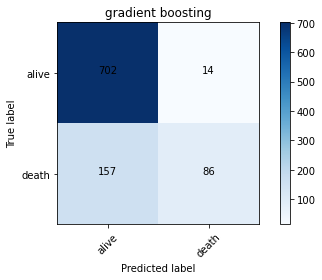

gradient boosting accuracy =  0.821689259645464
              precision    recall  f1-score   support

       alive       0.82      0.98      0.89       716
       death       0.86      0.35      0.50       243

    accuracy                           0.82       959
   macro avg       0.84      0.67      0.70       959
weighted avg       0.83      0.82      0.79       959



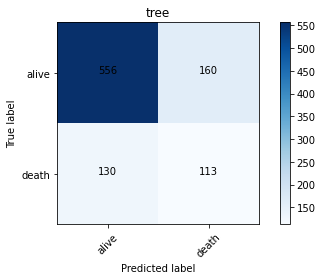

tree accuracy =  0.6976016684045881
              precision    recall  f1-score   support

       alive       0.81      0.78      0.79       716
       death       0.41      0.47      0.44       243

    accuracy                           0.70       959
   macro avg       0.61      0.62      0.62       959
weighted avg       0.71      0.70      0.70       959



In [166]:
pipeline.set_params(estimator__n_estimators=1,estimator__max_depth=2,estimator__warm_start=False)
prediction= cross_val_predict(pipeline, predictor, target, cv=cv)
gradient_acc=accuracy_score(target, prediction)
cm = confusion_matrix(target, prediction, labels=label_order)

plot_confusion_matrix(cm, classes=label_names, title='gradient boosting')
plt.show()
print('gradient boosting accuracy = ',gradient_acc)
print(classification_report(target, prediction, target_names=label_names))

cm_tree = confusion_matrix(target, tree_prediction, labels=label_order)
plot_confusion_matrix(cm_tree, classes=label_names, title='tree')
plt.show()
print('tree accuracy = ',acc_tree)
print(classification_report(target, tree_prediction, target_names=label_names))

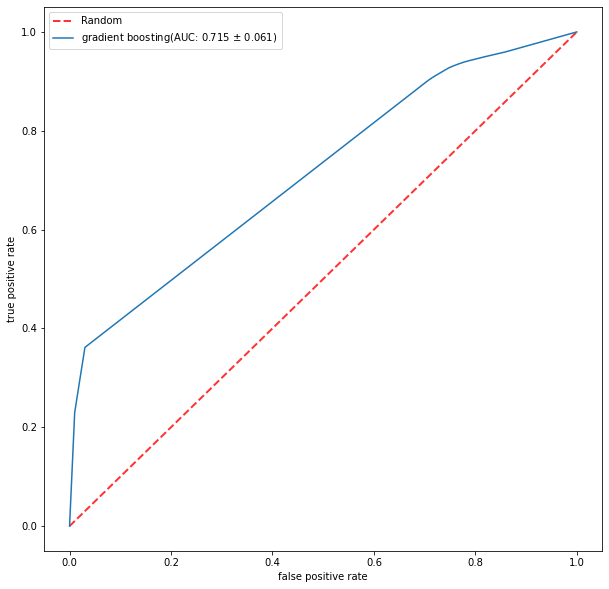

In [151]:

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8) # draw diagonal
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, predictor,target, 1)
plt.plot(mean_fpr, mean_tpr, label='gradient boosting(AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

이 데이터셋의 문제는 다른 알고리즘을 수행해도 최대값이 82%에서 개선되지 문제가 있다.

그레디언트 부스팅에서 n_estimators가 1일 때 끝나게 되는데 이유는 그레디언트 부스팅이 tree기반의 알고리즘이고 위에서 확인했다시피 max_depth가 2인 경우 최댓값이 나오기 때문에 n_estimators가 1일 때 끝나게 된다.

### random forest
tree의 max_depth가 2이면 최상임을 알고 있음으로 max_depth 파라미터를 조정하지 않고 수행했습니다
Max_features=sqrt,log2, Max_leaf_nodes=16 인 경우만 찾았습니다.


In [152]:
rf_clf=RandomForestClassifier(warm_start=True)
max_val_acc=-1.0
acc_going_up=0
pipeline.set_params(estimator=rf_clf)
best_n_estimators=0

for n_estimators in range(1,200):
    pipeline.set_params(estimator__n_estimators=n_estimators)
    y_pred = cross_val_predict(pipeline, predictor, target, cv=cv)
    val_acc=accuracy_score(target, y_pred)
    if val_acc>max_val_acc:
        max_val_acc=val_acc
        best_n_estimators=n_estimators
        acc_going_up=0
    else:
        acc_going_up+=1
        if acc_going_up==20:
            break
print("max acc = ",max_val_acc," best n_estimaors = ",best_n_estimators)

max acc =  0.7664233576642335  best n_estimaors =  20


In [153]:
rf_clf=RandomForestClassifier(max_features='log2',warm_start=True)
max_val_acc=-1.0
acc_going_up=0
pipeline.set_params(estimator=rf_clf)
best_n_estimators=0

for n_estimators in range(1,200):
    pipeline.set_params(estimator__n_estimators=n_estimators)
    y_pred = cross_val_predict(pipeline, predictor, target, cv=cv)
    val_acc=accuracy_score(target, y_pred)
    if val_acc>max_val_acc:
        max_val_acc=val_acc
        best_n_estimators=n_estimators
        acc_going_up=0
    else:
        acc_going_up+=1
        if acc_going_up==20:
            break
print("max acc = ",max_val_acc," best n_estimaors = ",best_n_estimators)

max acc =  0.7799791449426486  best n_estimaors =  2


In [154]:
rf_clf=RandomForestClassifier(max_leaf_nodes=16,warm_start=True)
max_val_acc=-1.0
acc_going_up=0
pipeline.set_params(estimator=rf_clf)
best_n_estimators=0

for n_estimators in range(1,200):
    pipeline.set_params(estimator__n_estimators=n_estimators)
    y_pred = cross_val_predict(pipeline, predictor, target, cv=cv)
    val_acc=accuracy_score(target, y_pred)
    if val_acc>max_val_acc:
        max_val_acc=val_acc
        best_n_estimators=n_estimators
        acc_going_up=0
    else:
        acc_going_up+=1
        if acc_going_up==20:
            break
print("max acc = ",max_val_acc," best n_estimaors = ",best_n_estimators)

max acc =  0.7956204379562044  best n_estimaors =  20


random forest accuracy =  0.7956204379562044


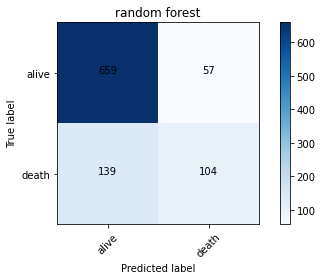

              precision    recall  f1-score   support

       alive       0.83      0.92      0.87       716
       death       0.65      0.43      0.51       243

    accuracy                           0.80       959
   macro avg       0.74      0.67      0.69       959
weighted avg       0.78      0.80      0.78       959



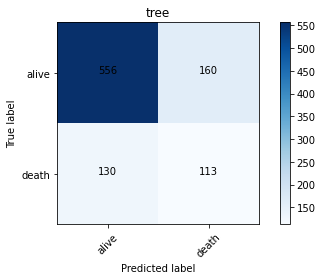

tree accuracy =  0.6976016684045881
              precision    recall  f1-score   support

       alive       0.81      0.78      0.79       716
       death       0.41      0.47      0.44       243

    accuracy                           0.70       959
   macro avg       0.61      0.62      0.62       959
weighted avg       0.71      0.70      0.70       959



In [155]:
rf_clf=RandomForestClassifier(max_leaf_nodes=16,n_estimators=24 )
pipeline.set_params(estimator=rf_clf)
prediction= cross_val_predict(pipeline, predictor, target, cv=cv)
random_forest_acc=accuracy_score(target, prediction)
cm = confusion_matrix(target, prediction, labels=label_order)
print('random forest accuracy = ',random_forest_acc)
plot_confusion_matrix(cm, classes=label_names, title='random forest')
plt.show()
print(classification_report(target, prediction, target_names=label_names))


cm_tree = confusion_matrix(target, tree_prediction, labels=label_order)
plot_confusion_matrix(cm_tree, classes=label_names, title='tree')
plt.show()
print('tree accuracy = ',acc_tree)
print(classification_report(target, tree_prediction, target_names=label_names))

 Max_features=sqrt, Max_leaf_nodes=16 ,n_estimators=24 인 경우 성능이 최대가 된다.

###  cost maxtrix 


Death를 alive로 예측한 경우 100 alive를 death로 예측한 경우 1로 하여 cost_matrix를 만들고 학습 시킨다.

Grid_search scoring에 cost_score를 적용

정확도는 줄었지만 사망에 대한 recall은 향상되었다.


In [168]:
from sklearn.metrics import make_scorer
def cost_function(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred, labels=label_order)
    return cm[1][0] * 100 + cm[0][1] * 1

Optimised Parameters: {'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__min_samples_split': 2}


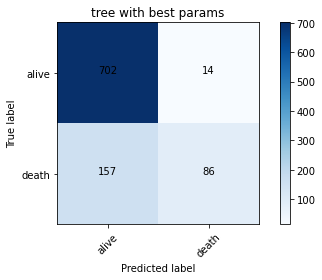

optimized tree accuracy =  0.821689259645464 cost :  15714
              precision    recall  f1-score   support

       alive       0.82      0.98      0.89       716
       death       0.86      0.35      0.50       243

    accuracy                           0.82       959
   macro avg       0.84      0.67      0.70       959
weighted avg       0.83      0.82      0.79       959



In [175]:
params={'estimator__criterion': ('gini', 'entropy'),
'estimator__max_depth': [2, 3, 4, 5, None],
'estimator__min_samples_split' :[1,2,3,4]}

tree1=DecisionTreeClassifier()
pipeline.set_params(estimator=tree1)
grid_search_estimator=GridSearchCV(pipeline,params,cv=cv)
prediction = cross_val_predict(grid_search_estimator,predictor, target, cv=cv )
optimized_tree_acc = accuracy_score(target, prediction)
grid_search_estimator.fit(predictor, target)

print("Optimised Parameters: {}".format(grid_search_estimator.best_params_))
cm = confusion_matrix(target, prediction, labels=label_order)


plot_confusion_matrix(cm, classes=label_names, title='tree with best params')
plt.show()
print('optimized tree accuracy = ',optimized_tree_acc,'cost : ',cost_function(target,prediction))
print(classification_report(target, prediction, target_names=label_names))



0.7111574556830031
Optimised Parameters: {'estimator__criterion': 'gini', 'estimator__max_depth': 6, 'estimator__min_samples_split': 5} 


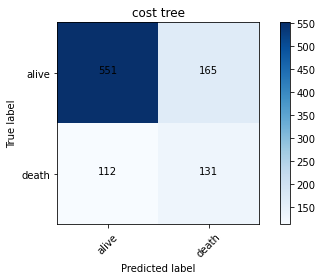

cost tree accuracy =  0.7111574556830031 cost :  11365
              precision    recall  f1-score   support

       alive       0.83      0.77      0.80       716
       death       0.44      0.54      0.49       243

    accuracy                           0.71       959
   macro avg       0.64      0.65      0.64       959
weighted avg       0.73      0.71      0.72       959



In [178]:
cost_score = make_scorer(cost_function, greater_is_better=False)
params={'estimator__criterion': ('gini', 'entropy'),
'estimator__max_depth': [2, 3, 4, 5,6, None],
'estimator__min_samples_split' :[1,2,3,4,5]}

tree1=DecisionTreeClassifier()
pipeline.set_params(estimator=tree1)
grid_search_estimator=GridSearchCV(pipeline,params,cv=cv,scoring=cost_score)
prediction = cross_val_predict(grid_search_estimator,predictor, target, cv=cv )
cost_tree_acc = accuracy_score(target, prediction)
print(cost_tree_acc )
grid_search_estimator.fit(predictor, target)

print("Optimised Parameters: {} ".format(grid_search_estimator.best_params_))
cm = confusion_matrix(target, prediction, labels=label_order)


plot_confusion_matrix(cm, classes=label_names, title='cost tree')
plt.show()
print('cost tree accuracy = ',cost_tree_acc,'cost : ',cost_function(target,prediction))
print(classification_report(target, prediction, target_names=label_names))




사망으로 예측하고 생존하는 경우보다 생존으로 예측하고 사망하는 경우 보호자가 상심이 크게 될 것 같아 위의 cost 함수를 만들었습니다. 

# 결과 및 토론


In [159]:
models = pd.DataFrame({
    'Model': ['base line tree', 'optimized tree',  
              'KNN', 'Gradient boosting', 'Random Forest', 
              ],
    'Score': [acc_tree,optimized_tree_acc ,knn_acc,gradient_acc,random_forest_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,optimized tree,0.821689
3,Gradient boosting,0.821689
4,Random Forest,0.795620
2,KNN,0.751825
0,base line tree,0.697602



최소 4%에서 최대 10%정도 성능이 개선되었는데

위의 알고리즘을 제외하고 다른 알고리즘(naive bayez, SVM)을 적용해도 82%에서 성능이 개선이 되지 않는다. 몇가지 이유를 추측할 수 있다.

### 1. 데이터의 품질이 좋지 않다.
학습용으로 만들어진 데이터가 아니라 국가 통계 마이크로센터에서 만든 raw한 데이터로 품질이 좋지 않는 데이터로 추측된다.

예를 들어 시각 데이터를 보면 논리적으로 이상한 부분이 있는데 심장정지 발생시각이 응급실 도착시각과 심장정지 목격시각보다 늦은 시각인 경우가 있었다.그리고 위에서의 다른 81.8% 나오는 예측기들의 roc 곡선이 거의 비슷하게 나오는데 이를 통해 위의 특성을 통해 완전히 분류하지 못하는 것들이 있음을 알 수 있다.

그리고 데이터의 많은 속성에서 nan값이 많아 제거함으로 품질이 낮아진 것 같다.



###  2. 데이터의 양이 적다. 
위에서 말한 것 처럼 nan을 제거하면서 총 데이터가 959개로 데이터의 양이 적어졌다.

# 개선 방법

### 1. 더 많은 데이터와 더 많은 속성을 추가한다. 
위에서 말한 문제를 해결하는 방법

처음에 과제를 진행하면서 67%대로 낮게 나와 다시 데이터 전처리를 하면서 심정지 발생후 심정지 목격에 걸린 시간을 추가시키 성능이 최대 80%로 개선을 시켰다. 그러므로 더 좋은 속성을 추가 시키면 개선이 될 것이다.

### 2. 임계값 조정 

이진 분류 문제에서 각 클래스에 대해 확률을 가지고 판별을 하는데 임계값이 0.5를 기준으로 판별을 하는데 이 임계값을 바꿔주면 조금더 개선 할 수 있다.

predict_proba메소드는 각 클레스에 대한 확률을 보여준다. 이 확률값을 구해 임계값을 조정해준다.

In [172]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('knn', Pipeline([ ('preprocessing', preprocessor), ('estimator', KNeighborsClassifier(n_neighbors=115))])),
    ('tree', Pipeline([ ('preprocessing', preprocessor), ('estimator', DecisionTreeClassifier(max_depth=2,min_samples_split=2))])),
    ('boosting', Pipeline([ ('preprocessing', preprocessor), ('estimator', GradientBoostingClassifier(max_depth=2,n_estimators=1))])),
    ('gaussian', Pipeline([ ('preprocessing', preprocessor), ('estimator', GaussianNB())])),
    ('svc', Pipeline([ ('preprocessing', preprocessor), ('estimator',SVC())]))
 ]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(),cv=cv)
clf.fit_transform(predictor,target)

prediction =clf.predict_proba(predictor)

best_score =  0.8342022940563086 best thresholds =  0.23
Optimised stacking with accuracy of 0.8342022940563086


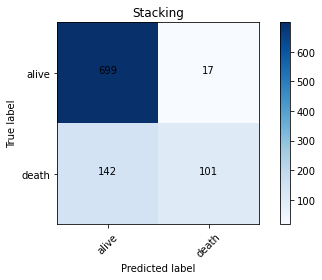

              precision    recall  f1-score   support

       alive       0.83      0.98      0.90       716
       death       0.86      0.42      0.56       243

    accuracy                           0.83       959
   macro avg       0.84      0.70      0.73       959
weighted avg       0.84      0.83      0.81       959



In [174]:
best_thresholds=0
best_score=0
for thresholds in np.arange(0,1,0.01):
    aa=[]
    for i in prediction:

        if i[1]>thresholds:
            aa.append(1)
        else :
            aa.append(0)
    acc = accuracy_score(target, aa)
    if acc>best_score:
        best_score=acc
        best_thresholds=thresholds
print("best_score = ",best_score,'best thresholds = ',best_thresholds)
aa=[]
for i in prediction:

    if i[1]>best_thresholds:
        aa.append(1)
    else :
        aa.append(0)
acc = accuracy_score(target, aa)
cm = confusion_matrix(target, aa, labels=label_order)
print("Optimised stacking with accuracy of {}".format(acc))
plot_confusion_matrix(cm, classes=label_names, title='Stacking')
plt.show()
print(classification_report(target, aa, target_names=label_names))

여기서 한가지 오류가 있는데 test_set이 포함된 결과로 임계값을 구했음으로 데이터셋에 대해 과적합이 되었다.

과적합이 없게 하려면 test validation train set으로 나눠서 계산을 구해야 한다. 이렇게 하기에는 데이터셋의 크기가 적어 위의 방법처럼 구현했습니다.

# 참고한 정보

조기 종료에 관한 정보는 핸즈온 머신러닝 4장(192페이지)에서 참고했습니다.

그리고 임계값 조정에 관한 것도 핸즈온 머신러닝 3장(138페이지)에서 참고했습니다.